SETTING UP THE NECESSARY DEPENDENCIES

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings(action='ignore')

In [79]:
# IMPORTING THE DATASET
total_datasets = pd.read_csv('combined_datasets2.csv')

In [80]:
#This shows the last five datapoints from the dataset
total_datasets.tail()

,Unnamed: 0.1,track_id,track_name,artist_name,popularity,danceability,energy,tempo,valence,acousticness,liveness,loudness,uri,duration_ms,instrumentalness,key,mode,speechiness,time_signature,Unnamed: 0
2945,2945,6N8rRKxeJYiyJfu2GVsJSG,Outlaw,Victony,44,0.589,0.447,115.238,0.419,0.6720,0.1020,-7.768,spotify:track:6N8rRKxeJYiyJfu2GVsJSG,197000,0.000010,10,0,0.3520,5,2552.0
2946,2946,4gMXTO4f8hCe6jVhujwpUd,Ole,Tiwa Savage,31,0.800,0.801,99.936,0.684,0.5920,0.5600,-6.315,spotify:track:4gMXTO4f8hCe6jVhujwpUd,183653,0.000055,6,1,0.2140,4,2553.0
2947,2947,2th2KOiIausYBrbWpQMjOM,Bombay,Tiwa Savage,28,0.725,0.679,121.053,0.656,0.1230,0.2450,-5.323,spotify:track:2th2KOiIausYBrbWpQMjOM,163960,0.000029,2,1,0.3320,5,2554.0
2948,2948,0mDRuZmReEm6DquPLJlcEm,Oleku (feat. Brymo),Ice Prince,45,0.544,0.730,162.112,0.751,0.3440,0.1400,-4.299,spotify:track:0mDRuZmReEm6DquPLJlcEm,291364,0.000001,1,0,0.1440,5,2555.0
2949,2949,6p0M9uwUKqn0ApceP3TkBy,Single & Searching,Yemi Alade,34,0.804,0.837,125.007,0.735,0.0548,0.0535,-5.122,spotify:track:6p0M9uwUKqn0ApceP3TkBy,219330,0.002170,6,0,0.0592,4,2556.0


In [81]:
print(total_datasets.shape) # Checking the shape of the data

datasets = total_datasets.copy()

(2950, 20)


In [82]:
# Droping unwanted columns 
datasets = datasets.drop(['track_id', 'track_name', 'artist_name', 'uri', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [83]:
# Creating another column called hit and setting values to popularity greater than 65 as 1 while less as 0
# 1 implies that the song is a hit while 0 implies it is not
datasets['hit'] = datasets['popularity'].apply(lambda x: 1 if x > 65 else 0)

In [84]:
# dict(datasets['popularity'].value_counts())

In [85]:
datasets.hit.value_counts() # Checking the value counts in the hit column.... this gives how many values of zeros and ones

0    2719
1     231
Name: hit, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


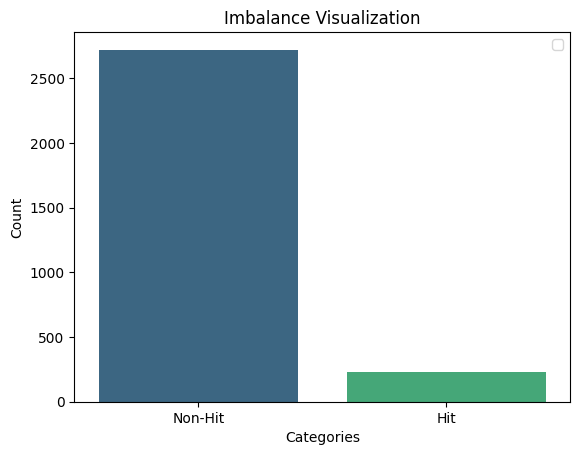

In [86]:
# ploting the value counts
import seaborn as sns

ax = sns.countplot(x='hit', data=datasets, palette='viridis')
ax.set_xticklabels(['Non-Hit', 'Hit'])

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Imbalance Visualization')

#Adding legend

plt.legend()

### EXPLORATORY DATA ANALYSIS

"\nThe result is plotted. you can see that the plot is in upward direction, also observer the line that cut through the dots (which are the datapoints) all are in one direction.\nThis shows that there is a very high positive correlation between loudness and energy. \nIf the energy increases, the loudness of the song increases and similarly, if the song's loudness decreases, the energy of the track also decreases.\n"

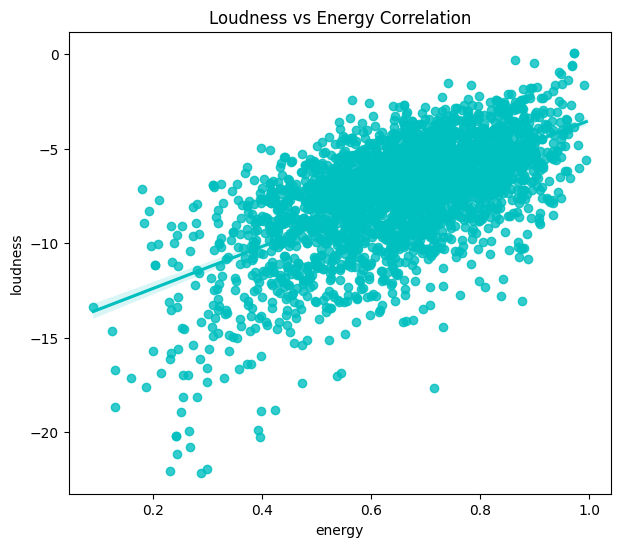

In [87]:
## Create a Regression Plot Between Loudness and Energy. Let’s Plot It  in the Form of a Regression Line.
plt.figure(figsize=(7, 6))
sns.regplot(data=datasets, y="loudness", x="energy", color='c').set(title="Loudness vs Energy Correlation")

"""
The result is plotted. you can see that the plot is in upward direction, also observer the line that cut through the dots (which are the datapoints) all are in one direction.
This shows that there is a very high positive correlation between loudness and energy. 
If the energy increases, the loudness of the song increases and similarly, if the song's loudness decreases, the energy of the track also decreases.
"""

## we can also plot between the correlation between the popularity and the instrumentalness

'\nHere, you can see the red color regression line is in downward direction, \nwhich denotes if the instrumentalness of the song increases, the popularity decreases and similarly, \nif the popularity increases, the instrumentalness decreases.\n'

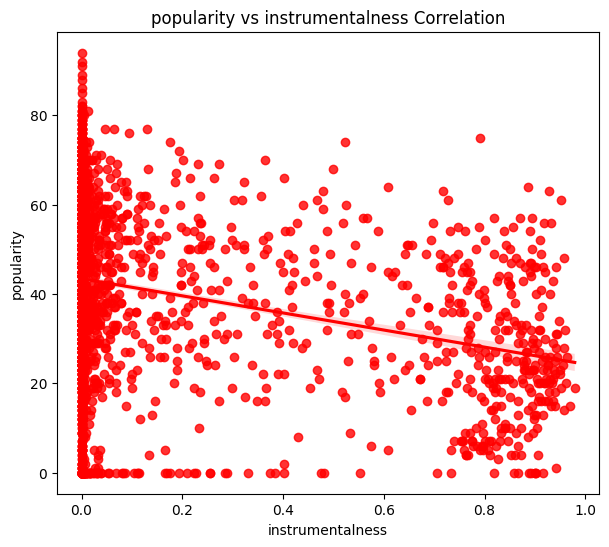

In [88]:
plt.figure(figsize=(7, 6))
sns.regplot(data=datasets, y="popularity", x="instrumentalness", color='r').set(title="popularity vs instrumentalness Correlation")

"""
Here, you can see the red color regression line is in downward direction, 
which denotes if the instrumentalness of the song increases, the popularity decreases and similarly, 
if the popularity increases, the instrumentalness decreases.
"""

'\nAfter running the piece of code, we got our correlation map. On the right side, you can see a scale ranging from -1 to +1. \nHere -1 denotes the variables that have the least or negative correlation, \nwhile the values above 0.0 denote the variables with a positive correlation. \n'

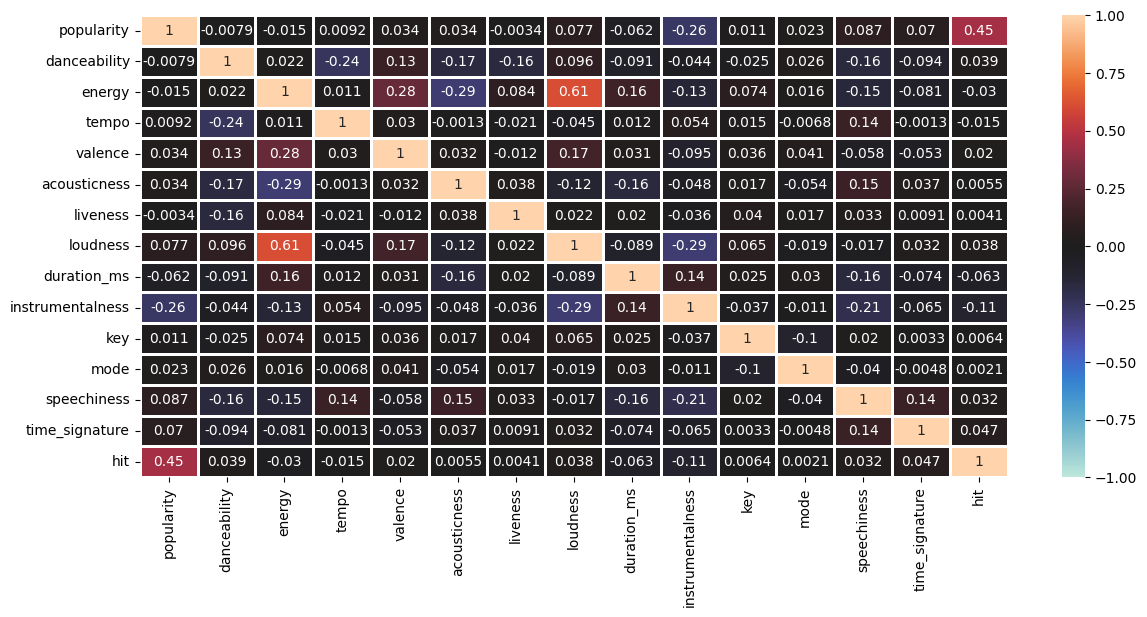

In [89]:
plt.figure(figsize=(14, 6))
sns.heatmap(datasets.corr(),annot = True, vmin=-1, vmax=1, center=0, linewidth=1)

"""
After running the piece of code, we got our correlation map. On the right side, you can see a scale ranging from -1 to +1. 
Here -1 denotes the variables that have the least or negative correlation, 
while the values above 0.0 denote the variables with a positive correlation. 
"""

In [90]:
# Having seen the value counts, there arise a need to handle imbalance in the dataset as seen

from imblearn.over_sampling import SMOTE

# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(datasets.drop('hit', axis=1), datasets['hit'])
new_datasets = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [91]:
new_datasets['hit'].value_counts()

1    2719
0    2719
Name: hit, dtype: int64

In [94]:
new_datasets.tail()

,hit,popularity,danceability,energy,tempo,valence,acousticness,liveness,loudness,duration_ms,instrumentalness,key,mode,speechiness,time_signature
5433,1,68,0.914000,0.505000,102.937000,0.540000,0.227000,0.132000,-6.770000,176453,0.000003,9,0,0.310000,4
5434,1,70,0.734385,0.637558,105.574919,0.610252,0.333351,0.147056,-8.243613,147708,0.054382,6,0,0.220211,4
5435,1,69,0.797531,0.661275,101.284046,0.840382,0.475652,0.096834,-7.105896,158229,0.000039,9,0,0.129287,4
5436,1,76,0.830839,0.716382,112.892020,0.687325,0.108897,0.100132,-6.512995,212900,0.000960,9,0,0.043070,4
5437,1,68,0.729005,0.685372,103.351233,0.620179,0.332932,0.146543,-7.727853,179152,0.000332,3,0,0.090435,4


In [95]:
new_datasets.tail()

,hit,popularity,danceability,energy,tempo,valence,acousticness,liveness,loudness,duration_ms,instrumentalness,key,mode,speechiness,time_signature
5433,1,68,0.914000,0.505000,102.937000,0.540000,0.227000,0.132000,-6.770000,176453,0.000003,9,0,0.310000,4
5434,1,70,0.734385,0.637558,105.574919,0.610252,0.333351,0.147056,-8.243613,147708,0.054382,6,0,0.220211,4
5435,1,69,0.797531,0.661275,101.284046,0.840382,0.475652,0.096834,-7.105896,158229,0.000039,9,0,0.129287,4
5436,1,76,0.830839,0.716382,112.892020,0.687325,0.108897,0.100132,-6.512995,212900,0.000960,9,0,0.043070,4
5437,1,68,0.729005,0.685372,103.351233,0.620179,0.332932,0.146543,-7.727853,179152,0.000332,3,0,0.090435,4


In [96]:
new_datasets.shape

(5438, 15)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


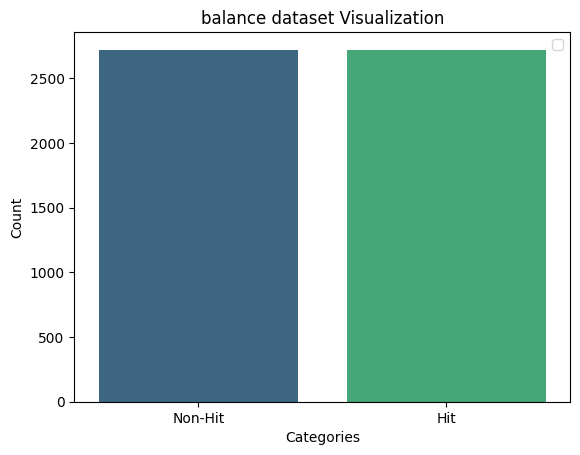

In [97]:
ax = sns.countplot(x='hit', data=new_datasets, palette='viridis')
ax.set_xticklabels(['Non-Hit', 'Hit'])

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('balance dataset Visualization')

#Adding legend

plt.legend()

In [ ]:
new_datasets.tail()

In [24]:
new_datasets['hit'].value_counts()

1    2719
0    2719
Name: hit, dtype: int64

In [25]:
new_datasets.describe()

,hit,popularity,danceability,energy,tempo,valence,acousticness,liveness,loudness,duration_ms,instrumentalness,key,mode,speechiness,time_signature
count,5438.000000,5438.000000,5438.000000,5438.000000,5438.000000,5438.000000,5438.000000,5438.000000,5438.000000,5438.000000,5438.000000,5438.000000,5438.000000,5438.000000,5438.000000
mean,0.500000,54.770872,0.744372,0.651631,114.762814,0.645076,0.268567,0.147475,-7.135820,199330.045605,0.077140,5.221221,0.354174,0.127476,4.006804
std,0.500046,21.027044,0.109866,0.134752,24.409722,0.181096,0.203871,0.103715,2.324561,63334.557479,0.209397,3.246845,0.478306,0.093299,0.259719
min,0.000000,0.000000,0.285000,0.090800,33.116000,0.036100,0.000007,0.019600,-22.157000,35893.000000,0.000000,0.000000,0.000000,0.023900,1.000000
25%,0.000000,42.000000,0.679000,0.568222,100.876203,0.540000,0.104000,0.093010,-8.082076,163392.500000,0.000007,2.000000,0.000000,0.058524,4.000000
50%,0.500000,65.500000,0.765000,0.659000,109.212863,0.660920,0.226000,0.112140,-6.854000,187111.000000,0.000347,5.000000,0.000000,0.094800,4.000000
75%,1.000000,70.000000,0.821126,0.744000,119.754547,0.780292,0.395594,0.159000,-5.679000,216702.250000,0.012791,8.000000,1.000000,0.168144,4.000000
max,1.000000,94.000000,0.978000,0.995000,217.969000,0.981000,0.973000,0.988000,0.078000,941360.000000,0.979000,11.000000,1.000000,0.880000,5.000000


In [26]:
datasets = new_datasets.drop('popularity', axis=1)

print(datasets['hit'].value_counts())

1    2719
0    2719
Name: hit, dtype: int64


In [ ]:
ax = sns.countplot(x='hit', data=datasets, palette='viridis')
ax.set_xticklabels(['Non-Hit', 'Hit'])

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Balanced Data Visualization')

#Adding legend

plt.legend()

In [28]:
datasets.head()

,hit,danceability,energy,tempo,valence,acousticness,liveness,loudness,duration_ms,instrumentalness,key,mode,speechiness,time_signature
0,1,0.729,0.675,119.968,0.779,0.1750,0.5500,-6.003,245867,0.000002,8,1,0.0312,4
1,1,0.829,0.878,87.991,0.883,0.0959,0.7760,-5.951,239307,0.000000,9,1,0.1010,4
2,1,0.463,0.382,74.573,0.638,0.8970,0.1080,-11.682,209160,0.263000,5,1,0.0278,4
3,0,0.734,0.648,97.984,0.672,0.1240,0.2150,-5.509,222640,0.000000,4,1,0.1730,4
4,0,0.795,0.565,87.925,0.550,0.1310,0.0802,-4.457,172342,0.000000,3,0,0.0948,4


In [29]:
datasets.to_csv('afro_balanced_dataset.csv')

In [30]:
# from imblearn.over_sampling import SMOTE
def dataprocessing(df):
    y=df['hit']
    X = df.drop(['hit'], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state=42, shuffle=True)
    # smote = SMOTE(sampling_strategy='auto', random_state=42)

    # class_weight = {0: 1, 1: len(y_train[y_train == 0]) / len(y_train[y_train == 1])}
    # X_sample, y_sample = smote.fit_resample(X_train, y_train)
    # standardize
    # std = StandardScaler()
    # std.fit(X_train)

    print(type(X_train))
    # X_train = pd.DataFrame(std.transform(X_train), index=X_train.index, columns=X_train.columns)
    # X_test = pd.DataFrame(std.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test

In [31]:
X_train, X_test, y_train, y_test= dataprocessing(datasets)

<class 'pandas.core.frame.DataFrame'>


In [33]:
# X_train.to_numpy().shapx
# X_test.head()

In [34]:
# from imblearn.over_sampling import SMOTE
# # Resampling the minority class. The strategy can be changed as required.
# sm = SMOTE(sampling_strategy='minority', random_state=42)
# # Fit the model to generate the data.
# X_train, y_train = sm.fit_resample(X_train, y_train)
# new_datasets = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [32]:
X_train.shape, y_train.value_counts()

((4350, 13),
 0    2175
 1    2175
 Name: hit, dtype: int64)

In [35]:
print(len(X_train))
print(len(X_test))
print(len(y_train))

4350
1088
4350


In [36]:
X_train.tail()
# print(class_weight)

,danceability,energy,tempo,valence,acousticness,liveness,loudness,duration_ms,instrumentalness,key,mode,speechiness,time_signature
3772,0.574926,0.456418,122.269898,0.605527,0.554057,0.091242,-8.698016,184664,0.000050,9,0,0.068004,4
5191,0.818824,0.547055,96.081206,0.685511,0.207778,0.095571,-9.183377,220267,0.000220,7,1,0.082938,4
5226,0.857212,0.705833,96.794860,0.780623,0.047568,0.115750,-3.157217,209585,0.007125,3,0,0.161788,4
5390,0.649806,0.510115,168.192326,0.734788,0.618582,0.088931,-5.631961,167761,0.000826,3,0,0.085728,4
860,0.821000,0.619000,115.949000,0.388000,0.028600,0.118000,-9.496000,168103,0.000005,6,0,0.102000,4


In [37]:
y_train.value_counts()

0    2175
1    2175
Name: hit, dtype: int64

In [38]:
print(X_test.shape)
print(y_test.value_counts(), y_test.shape)

(1088, 13)
1    544
0    544
Name: hit, dtype: int64 (1088,)


In [39]:
datasets.isnull().sum()

hit                 0
danceability        0
energy              0
tempo               0
valence             0
acousticness        0
liveness            0
loudness            0
duration_ms         0
instrumentalness    0
key                 0
mode                0
speechiness         0
time_signature      0
dtype: int64

In [40]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

In [68]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [67]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

                   Logistic Regression: 50.00%
                   K-Nearest Neighbors: 67.56%
                         Decision Tree: 80.06%
Support Vector Machine (Linear Kernel): 50.00%
   Support Vector Machine (RBF Kernel): 55.70%
                        Neural Network: 47.06%
                         Random Forest: 88.24%
                     Gradient Boosting: 80.70%


In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
acc3 = accuracy_score(y_test, y_pred) * 100
print(f"Random Forest (Tuned): {acc3:.2f}%")

Random Forest (Tuned): 88.97%


In [70]:
from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=None)), ('svc', LinearSVC())
]
stack_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=2500, C=0.01))
stack_classifier.fit(X_train, y_train)
y_pred2 = stack_classifier.predict(X_test)
acc4 = accuracy_score(y_test, y_pred2) * 100
print(f"stack classifier: {acc4:.2f}%")

stack classifier: 87.87%


In [71]:
model_1 = RandomForestClassifier()

In [48]:
X_test.head()

,danceability,energy,tempo,valence,acousticness,liveness,loudness,duration_ms,instrumentalness,key,mode,speechiness,time_signature
3204,0.679051,0.408317,112.838667,0.508587,0.605713,0.440522,-10.280025,105246,0.001171,7,0,0.039118,4
4515,0.660992,0.453603,115.168577,0.410297,0.010475,0.052763,-10.571981,330423,0.367465,1,1,0.085629,4
2146,0.834000,0.494000,100.012000,0.560000,0.690000,0.124000,-8.980000,187200,0.000000,5,0,0.192000,4
3105,0.715034,0.732236,103.841010,0.540457,0.334789,0.160740,-4.258162,145646,0.001252,7,1,0.061816,4
881,0.868000,0.521000,113.993000,0.886000,0.281000,0.099200,-6.902000,206316,0.000064,1,0,0.051200,4


In [49]:
model_1.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
y_pred = model_1.predict(X_test)

acc = accuracy_score(y_test, y_pred) * 100

print(f"Accuracy: {acc:.2f}%")

Accuracy: 87.87%


In [51]:
X_test.head()

,danceability,energy,tempo,valence,acousticness,liveness,loudness,duration_ms,instrumentalness,key,mode,speechiness,time_signature
3204,0.679051,0.408317,112.838667,0.508587,0.605713,0.440522,-10.280025,105246,0.001171,7,0,0.039118,4
4515,0.660992,0.453603,115.168577,0.410297,0.010475,0.052763,-10.571981,330423,0.367465,1,1,0.085629,4
2146,0.834000,0.494000,100.012000,0.560000,0.690000,0.124000,-8.980000,187200,0.000000,5,0,0.192000,4
3105,0.715034,0.732236,103.841010,0.540457,0.334789,0.160740,-4.258162,145646,0.001252,7,1,0.061816,4
881,0.868000,0.521000,113.993000,0.886000,0.281000,0.099200,-6.902000,206316,0.000064,1,0,0.051200,4


In [52]:
X_test.loc[3204,:]

danceability             0.679051
energy                   0.408317
tempo                  112.838667
valence                  0.508587
acousticness             0.605713
liveness                 0.440522
loudness               -10.280025
duration_ms         105246.000000
instrumentalness         0.001171
key                      7.000000
mode                     0.000000
speechiness              0.039118
time_signature           4.000000
Name: 3204, dtype: float64

In [53]:
X_test

,danceability,energy,tempo,valence,acousticness,liveness,loudness,duration_ms,instrumentalness,key,mode,speechiness,time_signature
3204,0.679051,0.408317,112.838667,0.508587,0.605713,0.440522,-10.280025,105246,0.001171,7,0,0.039118,4
4515,0.660992,0.453603,115.168577,0.410297,0.010475,0.052763,-10.571981,330423,0.367465,1,1,0.085629,4
2146,0.834000,0.494000,100.012000,0.560000,0.690000,0.124000,-8.980000,187200,0.000000,5,0,0.192000,4
3105,0.715034,0.732236,103.841010,0.540457,0.334789,0.160740,-4.258162,145646,0.001252,7,1,0.061816,4
881,0.868000,0.521000,113.993000,0.886000,0.281000,0.099200,-6.902000,206316,0.000064,1,0,0.051200,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,0.681000,0.879000,125.021000,0.668000,0.050800,0.044800,-1.864000,300262,0.000000,0,0,0.145000,4
1041,0.850000,0.645000,104.022000,0.930000,0.358000,0.092500,-6.302000,153877,0.000011,11,0,0.061100,4
1634,0.811000,0.652000,109.999000,0.738000,0.463000,0.066700,-2.798000,256694,0.001580,1,1,0.073600,4
2462,0.703000,0.625000,89.954000,0.807000,0.370000,0.756000,-9.779000,168545,0.000000,5,1,0.095000,4


In [54]:
sample_test_data = (
    [-2.129593400176569,1.1849066767825516,1.7628064860351476,1.0124246820013965,-0.36700919693619644,-0.020404264959526158,0.7020515554689218,0.013825741747689578,-0.45627200709438126,1.593071043014108,1.068438486085228,-0.5379086043721599,3.116504948675754],
    [0.7108480349279459,-1.1418847421296872,-0.8334101969015297,0.03941072989623649,-0.48706536800275385,-0.5366496288643218,-0.9247476589369766,0.17592872104642202,-0.4562809944176291,0.1821096748863234,1.068438486085228,-0.2923069712451033,-0.09386243625431016],
    [0.5859019307444637,0.5313135815824847,-0.3889123416917233,-1.248112782485339,-0.6471402627581637,-0.6110633750127608,-0.027191045978984488,-0.2346780993589682,-0.4562911850644918,0.7464942221374372,-0.9359453192892858,0.26257079248639487,-0.09386243625431016],
    [0.569242450186666,-0.27260592551359786,-0.5728040578044302,0.8699125375011455,0.5934401715962629,-0.44177210252506205,0.11809052185077308,-0.6349000750360065,-0.4562911850644918,1.310878769388551,-0.9359453192892858,0.141286035386614,-0.09386243625431016],
)

In [55]:
sample_test_data[1]

[0.7108480349279459,
 -1.1418847421296872,
 -0.8334101969015297,
 0.03941072989623649,
 -0.48706536800275385,
 -0.5366496288643218,
 -0.9247476589369766,
 0.17592872104642202,
 -0.4562809944176291,
 0.1821096748863234,
 1.068438486085228,
 -0.2923069712451033,
 -0.09386243625431016]

In [56]:
# type(X_train)

check = [0.25081682, 0.23232518, 0, 0.45904428, 2306.2140201710604, 2567.4344222611962, 0.23232518, 154647.48299319728, 5147.019054330947, 0.4650071, 0.01960037, 20.187504983722118, 0]

In [57]:
input_data = np.asarray(X_test.loc[4515,:])

In [58]:
input_data

array([ 6.60992097e-01,  4.53602966e-01,  1.15168577e+02,  4.10297045e-01,
        1.04746097e-02,  5.27628008e-02, -1.05719808e+01,  3.30423000e+05,
        3.67465225e-01,  1.00000000e+00,  1.00000000e+00,  8.56294555e-02,
        4.00000000e+00])

In [59]:
X_test.head()

X_ = np.asarray(X_test)
sample_test_data[3] in X_

False

In [76]:
type(model_1)

sklearn.ensemble._forest.RandomForestClassifier

In [55]:
check_ = np.asarray(check)
check_

array([2.50816820e-01, 2.32325180e-01, 0.00000000e+00, 4.59044280e-01,
       2.30621402e+03, 2.56743442e+03, 2.32325180e-01, 1.54647483e+05,
       5.14701905e+03, 4.65007100e-01, 1.96003700e-02, 2.01875050e+01,
       0.00000000e+00])

In [77]:
reshape_check = check_.reshape(1, -1)

pred_ = model_1.predict(reshape_check)

In [78]:
pred_

array([0], dtype=int64)

In [79]:
reshaped_input_data = input_data.reshape(1, -1) 

new_pred = model_1.predict(reshaped_input_data)

In [80]:
new_pred

array([1], dtype=int64)

In [81]:
y_test

3204    1
4515    1
2146    0
3105    1
881     1
       ..
1941    0
1041    1
1634    0
2462    0
2809    0
Name: hit, Length: 1088, dtype: int64

In [82]:
new_pred

array([1], dtype=int64)

In [83]:
print(new_pred ,reshaped_input_data)

[1] [[ 6.60992097e-01  4.53602966e-01  1.15168577e+02  4.10297045e-01
   1.04746097e-02  5.27628008e-02 -1.05719808e+01  3.30423000e+05
   3.67465225e-01  1.00000000e+00  1.00000000e+00  8.56294555e-02
   4.00000000e+00]]


In [62]:
y_test_list = list(y_test)



new_pred == y_test_list[3]


array([ True])

In [69]:
import joblib

In [61]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred1 = logistic_model.predict(X_test)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred2 = logistic_model.predict(X_test)


DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
y_pred3 = DT_model.predict(X_test)


LSVC_model = LinearSVC()
LSVC_model.fit(X_train, y_train)
y_pred4 = LSVC_model.predict(X_test)


svc_model = SVC()  
svc_model.fit(X_train, y_train)
y_pred5 = svc_model.predict(X_test)


# mplMLPClassifier()
RFC_model = RandomForestClassifier()
RFC_model.fit(X_train, y_train)
y_pred6 = RFC_model.predict(X_test)


GBC_model = GradientBoostingClassifier() #Gradient
GBC_model.fit(X_train, y_train)
y_pred7 = GBC_model.predict(X_test)

In [75]:
# Decision Tree: 80.06%
# Random Forest: 88.24%
# Gradient Boosting: 80.70%

DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
y_pred_1 = DT_model.predict(X_test)

RFC_model = RandomForestClassifier()
RFC_model.fit(X_train, y_train)
y_pred_2 = RFC_model.predict(X_test)

GBC_model = GradientBoostingClassifier() #Gradient
GBC_model.fit(X_train, y_train)
y_pred_3 = GBC_model.predict(X_test)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_4 = logistic_model.predict(X_test)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_5 = logistic_model.predict(X_test)

LSVC_model = LinearSVC()
LSVC_model.fit(X_train, y_train)
y_pred_6 = LSVC_model.predict(X_test)

svc_model = SVC()  
svc_model.fit(X_train, y_train)
y_pred_7 = svc_model.predict(X_test)

In [70]:
# joblib.dump(value=RFC_model, filename='rfc_model.pkl')
# joblib.dump(value=DT_model, filename='dt_model.pkl')
# joblib.dump(value=GBC_model, filename='gbc_model.pkl')
joblib.dump(value=model_1, filename='radomF_Mod.pkl')

['radomF_Mod.pkl']

In [62]:
print(f"{(accuracy_score(y_test, y_pred5) *100):.2f}%")

55.70%


In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [65]:
precision = precision_score(y_test, y_pred7)

acc = accuracy_score(y_test, y_pred7)

f1 = f1_score(y_test, y_pred7)

recall = f1_score(y_test, y_pred7)

roc_auc = roc_auc_score(y_test, y_pred7)


print(f"Precision: {precision:.2f}")
print(f"f1: {f1:.2f}")
print(f"recall: {recall:.2f}")
print(f"roc_auc: {roc_auc:.2f}")
print(f"Acc: {acc:.2f}")

Precision: 0.77
f1: 0.82
recall: 0.82
roc_auc: 0.81
Acc: 0.81


In [ ]:
# Decision Tree Classifier
precision_DT = precision_score(y_test, y_pred_1)

acc_DT = accuracy_score(y_test, y_pred_1)

f1_DT = f1_score(y_test, y_pred_1)

recall_DT = f1_score(y_test, y_pred_1)

roc_auc_DT = roc_auc_score(y_test, y_pred_1)


print(f"Precision: {precision_DT:.2f}")
print(f"f1: {f1_DT:.2f}")
print(f"recall: {recall_DT:.2f}")
print(f"roc_auc: {roc_auc_DT:.2f}")
print(f"Acc: {acc_DT:.2f}")

print("##############################")

# For Gradient Boosting Classifier
precision_G = precision_score(y_test, y_pred_3)

acc_G = accuracy_score(y_test, y_pred_3)

f1_G = f1_score(y_test, y_pred_3)

recall_G = f1_score(y_test, y_pred_3)

roc_auc_G = roc_auc_score(y_test, y_pred_3)


print(f"Precision: {precision_G:.2f}")
print(f"f1: {f1_G:.2f}")
print(f"recall: {recall_G:.2f}")
print(f"roc_auc: {roc_auc_G:.2f}")
print(f"Acc: {acc_G:.2f}")

In [71]:
X_train.head()

,danceability,energy,tempo,valence,acousticness,liveness,loudness,duration_ms,instrumentalness,key,mode,speechiness,time_signature
1643,0.842000,0.446000,110.106000,0.676000,0.672000,0.111000,-9.910000,177373,0.039600,5,0,0.069500,4
596,0.805000,0.666000,101.012000,0.512000,0.341000,0.185000,-4.487000,154455,0.000033,6,1,0.035700,4
4647,0.795292,0.641847,103.685901,0.513818,0.264293,0.080526,-7.076012,178225,0.006648,1,1,0.051368,4
1615,0.505000,0.548000,136.352000,0.515000,0.757000,0.198000,-6.508000,174118,0.000000,1,0,0.398000,5
2687,0.568000,0.470000,125.119000,0.777000,0.194000,0.127000,-9.211000,165600,0.000003,0,1,0.111000,5


In [741]:
# ['danceability', 'energy', 'tempo', 'valence', 'acousticness',
#        'liveness', 'loudness', 'duration_ms', 'instrumentalness', 'key',
#        'mode', 'speechiness', 'time_signature']

X_test.columns

Index(['danceability', 'energy', 'tempo', 'valence', 'acousticness',
       'liveness', 'loudness', 'duration_ms', 'instrumentalness', 'key',
       'mode', 'speechiness', 'time_signature'],
      dtype='object')

In [87]:
X_test['hit'] = y_test

In [94]:
X_test.head(20)

,danceability,energy,tempo,valence,acousticness,liveness,loudness,duration_ms,instrumentalness,key,mode,speechiness,time_signature,hit
3204,0.679051,0.408317,112.838667,0.508587,0.605713,0.440522,-10.280025,105246,0.001171,7,0,0.039118,4,1
4515,0.660992,0.453603,115.168577,0.410297,0.010475,0.052763,-10.571981,330423,0.367465,1,1,0.085629,4,1
2146,0.834000,0.494000,100.012000,0.560000,0.690000,0.124000,-8.980000,187200,0.000000,5,0,0.192000,4,0
3105,0.715034,0.732236,103.841010,0.540457,0.334789,0.160740,-4.258162,145646,0.001252,7,1,0.061816,4,1
881,0.868000,0.521000,113.993000,0.886000,0.281000,0.099200,-6.902000,206316,0.000064,1,0,0.051200,4,1
2858,0.875000,0.810000,111.965000,0.782000,0.007000,0.068100,-7.175000,155636,0.000000,3,0,0.108000,4,0
230,0.777000,0.647000,112.951000,0.431000,0.487000,0.097600,-9.612000,151118,0.079000,7,0,0.048600,4,0
4952,0.834811,0.465872,93.512675,0.635240,0.502180,0.157632,-8.023703,224054,0.000053,1,0,0.320039,4,1
5013,0.878727,0.697167,112.361822,0.853611,0.219466,0.161301,-5.971610,182480,0.001331,4,0,0.102996,4,1
79,0.551000,0.638000,85.443000,0.378000,0.408000,0.660000,-12.126000,148663,0.000002,11,1,0.305000,4,1


In [95]:
test = [0.773000,0.725000,91.888000,0.548000,0.045400,0.087500,-3.868000,147472,0.007230,1,0,0.166000,4]

test = np.asarray(test)

reshape_test = test.reshape(1, -1)

pred = model_1.predict(reshape_test)
pred

array([0], dtype=int64)

In [91]:
model_1

RandomForestClassifier()

In [96]:
X_test.to_csv('Test_datasets.csv')